<a href="https://colab.research.google.com/github/Bryan-Az/ClusteringMethod-Slate/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# Hierarchical Clustering
In this notebook, I'll be using the speech audio dataset and run hierarchical clustering on the same set of data used in the DBScan and K-Means notebooks.
## Data Loading & Pre-processing & Selection

In [27]:
# reading in the metadata for the audio files (will be using the numerical data)
actors_meta_df = pd.read_csv('data_samples/actors_meta_df.csv')

In [28]:
#selecting the numerical categorical label-like emotion data
numerical_emotion_df = actors_meta_df[['tempo', 'modality', 'vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition']]
# d-typing the columns to be floats
numerical_emotion_df = numerical_emotion_df.astype(float)

In [29]:
numerical_emotion_df.head()

,tempo,modality,vocal_channel,emotion,emotional_intensity,statement,repetition
0,83.354335,3.0,1.0,1.0,1.0,2.0,2.0
1,71.777344,3.0,1.0,2.0,1.0,2.0,1.0
2,99.384014,3.0,1.0,2.0,2.0,1.0,1.0
3,161.499023,3.0,1.0,3.0,1.0,1.0,2.0
4,51.679688,3.0,1.0,3.0,2.0,2.0,2.0


In [30]:
# applying the standard scaler to the numerical data
scaler = StandardScaler()
scaler.fit(numerical_emotion_df)
scaled_df = scaler.transform(numerical_emotion_df)
scaled_df = pd.DataFrame(scaler.transform(numerical_emotion_df))

In [31]:
scaled_df.describe() # the transformed data is now in a range of 0-1
scaled_df.columns = ['tempo', 'modality', 'vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition']

In [32]:
scaled_df_interpretable = scaled_df.loc[:, ['tempo', 'emotion', 'emotional_intensity', 'statement', 'repetition']]
scaled_df_interpretable.head()

,tempo,emotion,emotional_intensity,statement,repetition
0,-1.016677,-1.716790,-0.935414,1.0,1.0
1,-1.295054,-1.256936,-0.935414,1.0,-1.0
2,-0.631232,-1.256936,1.069045,-1.0,-1.0
3,0.862367,-0.797081,-0.935414,-1.0,1.0
4,-1.778317,-0.797081,1.069045,1.0,1.0


In [33]:
scaled_df_interpretable.describe()

,tempo,emotion,emotional_intensity,statement,repetition
count,1.440000e+03,1.440000e+03,1.440000e+03,1440.000000,1440.000000
mean,-1.554312e-16,-9.868649e-18,2.540406e-16,0.000000,0.000000
std,1.000347e+00,1.000347e+00,1.000347e+00,1.000347,1.000347
min,-1.891287e+00,-1.716790e+00,-9.354143e-01,-1.000000,-1.000000
25%,-8.019296e-01,-7.970811e-01,-9.354143e-01,-1.000000,-1.000000
50%,-6.224228e-02,1.226279e-01,-9.354143e-01,0.000000,0.000000
75%,6.339340e-01,1.042337e+00,1.069045e+00,1.000000,1.000000
max,3.192382e+00,1.502191e+00,1.069045e+00,1.000000,1.000000


## Exploratory Data Analysis & Visualization

In [34]:
# applying PCA to the scaled data
pca = PCA(n_components=2)
pca.fit(scaled_df_interpretable)
pca_df = pca.transform(scaled_df_interpretable)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,1.929035,-0.409483
1,1.646587,-1.482976
2,0.149863,-0.083424
3,1.149331,1.357508
4,-0.093402,-0.930054


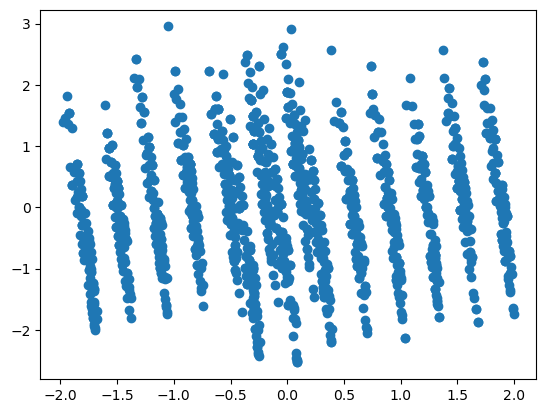

In [35]:
# plotting the pca
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# Clustering using Seaborn's Hierarchical Clustermap Function

## Clustering the PCA dataframe with only two components

In [42]:
pca_df.head()

,PC1,PC2
0,1.929035,-0.409483
1,1.646587,-1.482976
2,0.149863,-0.083424
3,1.149331,1.357508
4,-0.093402,-0.930054


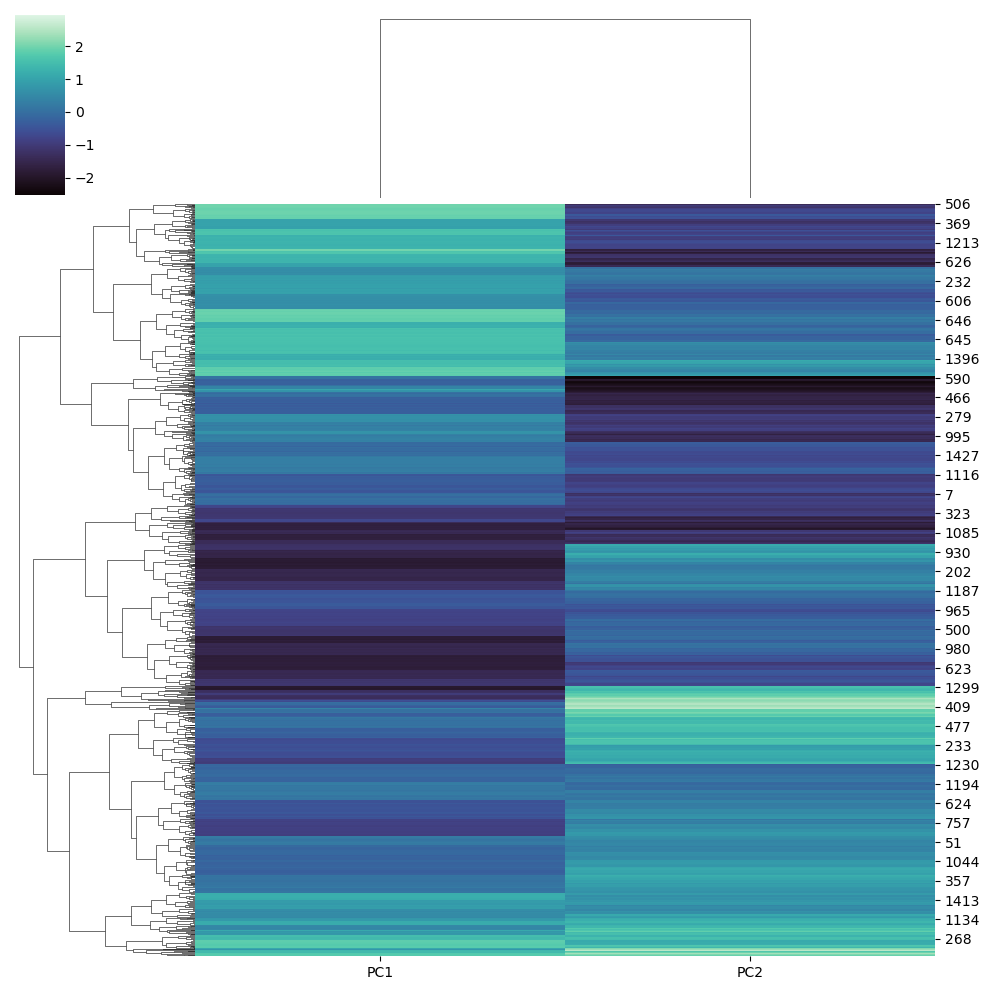

In [47]:
pca_df_clustermap = sns.clustermap(pca_df, cmap='mako')

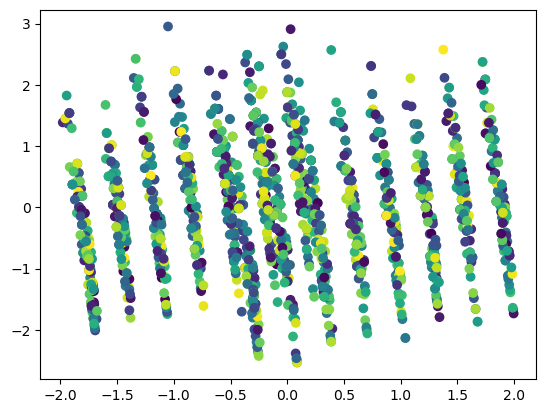

In [49]:
# plotting the clustermap of the pca data on the plot of pca, coloring the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df_clustermap.dendrogram_row.reordered_ind)

## Clustering the scaled_df_interpretable dataset having the 5 features


In [43]:
scaled_df_interpretable.head()  

,tempo,emotion,emotional_intensity,statement,repetition
0,-1.016677,-1.716790,-0.935414,1.0,1.0
1,-1.295054,-1.256936,-0.935414,1.0,-1.0
2,-0.631232,-1.256936,1.069045,-1.0,-1.0
3,0.862367,-0.797081,-0.935414,-1.0,1.0
4,-1.778317,-0.797081,1.069045,1.0,1.0


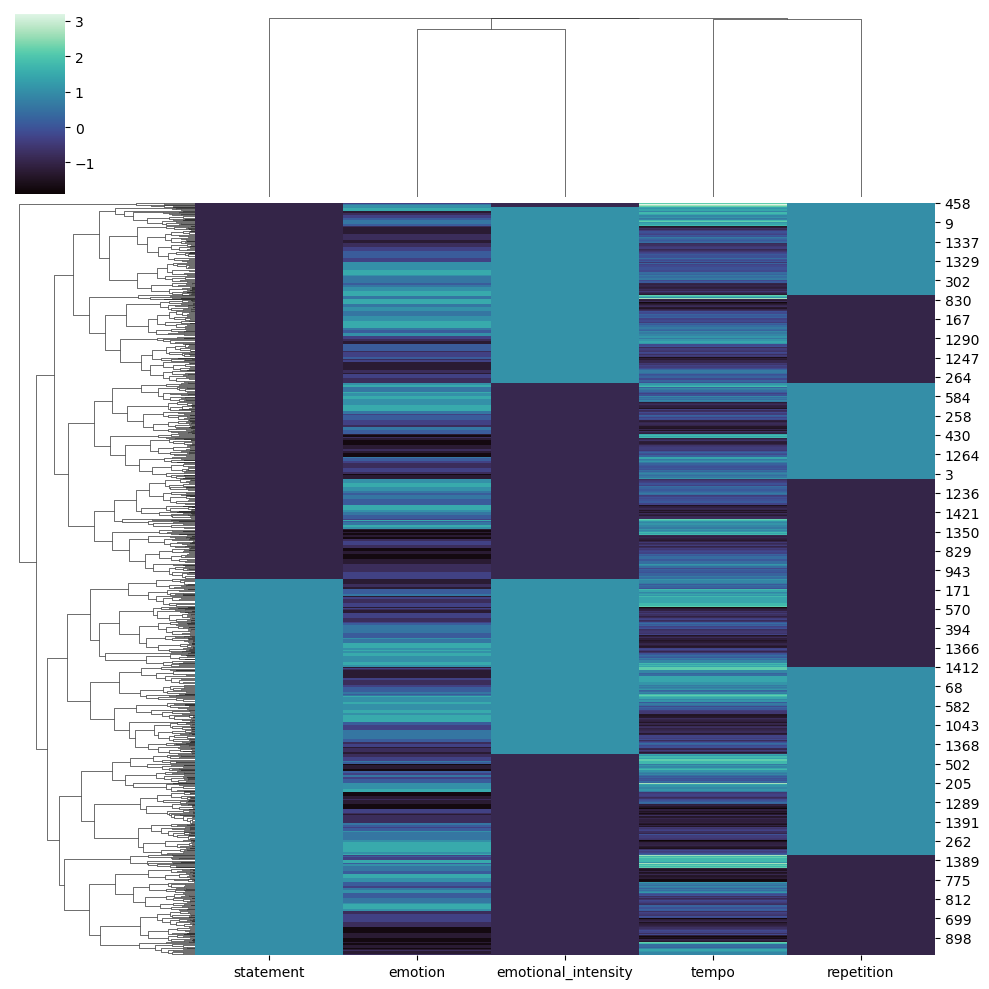

In [59]:
scaled_df_clustermap = sns.clustermap(scaled_df_interpretable, cmap='mako')

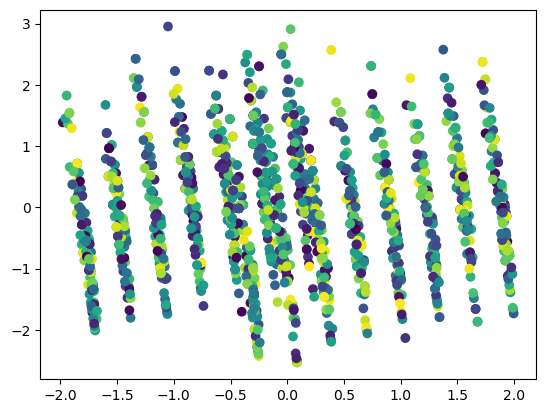

In [60]:
# plotting the clustermap of the scaled_df_interpretable data on the plot of pca, coloring the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=scaled_df_clustermap.dendrogram_row.reordered_ind)

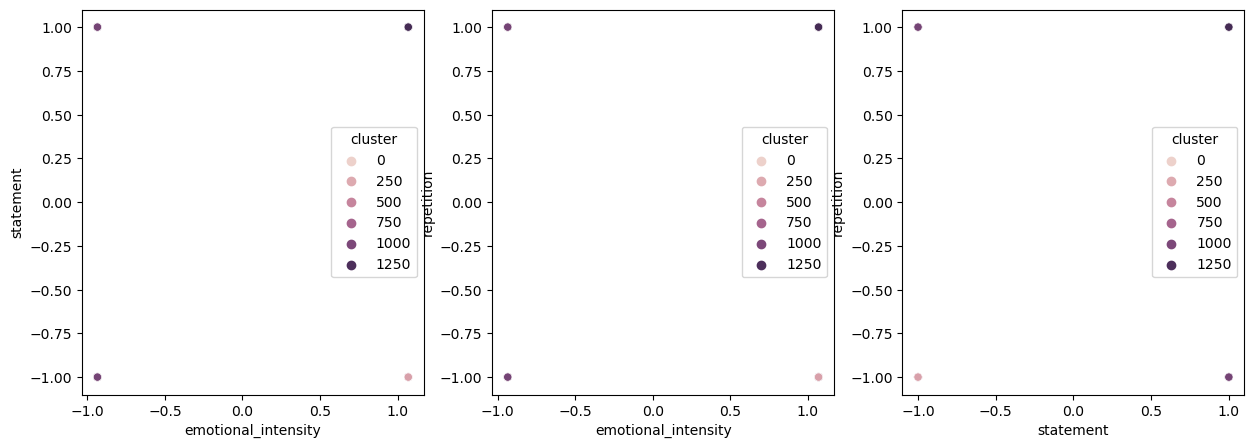

In [65]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=scaled_df_interpretable, x='emotional_intensity', y='statement', hue='cluster', ax=axes[0])
sns.scatterplot(data=scaled_df_interpretable, x='emotional_intensity', y='repetition', hue='cluster', ax=axes[1])
sns.scatterplot(data=scaled_df_interpretable, x='statement', y='repetition', hue='cluster', ax=axes[2])

plt.show()


## Assess
Although the hierarchical clustering was done on the scaled_df and the pca_df seperately, the clusters that were generated seem to look the same. My suspicion was that the clustering of the pca_df would appear to be clustered more accurately as I am labeling the clusters and visualizing the plot using the PCA dataframe. However, this seems to be incorrect. 

This clustering method from Seaborn seems to be learning relationships in the data that may be more lower dimensional than the PCA plot can show, so the cluster relationships as shown in the PCA plot may not be the best to display the clusters by.

Another interesting difference between Seaborn's Hierarchical clustermap and other clustering algorithms/methods such as K-Means/ Gaussian Mixture Model/ and DBSCAN is that it clusters by assigning a continuous value instead of a discrete categorical.

